## Optimization via Gene Expression Algorithms:

Gene Expression Algorithms (GEA) are inspired by the biological process of gene
expression in living organisms. This process involves the translation of genetic
information encoded in DNA into functional proteins. In GEA, solutions to
optimization problems are encoded in a manner similar to genetic sequences. The
algorithm evolves these solutions through selection, crossover, mutation, and gene
expression to find optimal or near-optimal solutions. GEA is effective for solving
complex optimization problems in various domains, including engineering, data
analysis, and machine learning

# Pseudocode

1. Define the optimization problem:
    - Define the objective function f(x) to minimize or maximize.

2. Initialize parameters:
    - Set population size, number of genes, mutation rate, crossover rate, and number of generations.

3. Initialize population:
    - Generate an initial population of random genetic sequences (chromosomes).

4. Evaluate fitness:
    - Compute fitness of each chromosome using f(x).

5. Iterate for a fixed number of generations:
    For each generation:
        a. Selection:
            - Select chromosomes based on their fitness (e.g., roulette wheel or tournament selection).

        b. Crossover:
            - Perform crossover between selected chromosomes to generate offspring.

        c. Mutation:
            - Apply mutation to offspring by altering gene values with a small probability.

        d. Gene expression:
            - Decode genetic sequences into functional solutions.

        e. Evaluate fitness of offspring.

        f. Update population:
            - Replace the old population with the new offspring.

6. Output the best solution:
    - Track and return the best chromosome and its fitness.


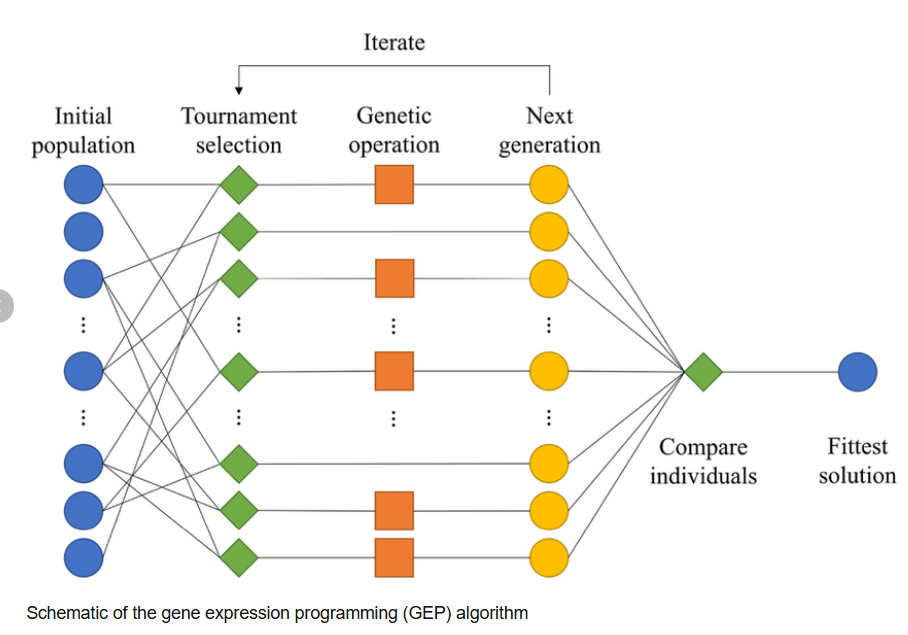

In [4]:
import numpy as np
print("C NEHA-1BM22CS074")

# Objective function (example: Sphere function)
def sphere_function(x):
    return np.sum(x**2)

# Gene Expression Algorithm
def gene_expression_algorithm(
    objective_function, population_size, num_genes, mutation_rate, crossover_rate, generations, bounds
):
    lb, ub = bounds

    # Initialize population
    population = np.random.uniform(lb, ub, (population_size, num_genes))
    fitness = np.array([objective_function(individual) for individual in population])
    best_solution = population[np.argmin(fitness)]
    best_score = np.min(fitness)

    # Main loop
    for generation in range(generations):
        # Selection (roulette wheel selection)
        inverted_fitness = 1 / (1 + fitness)  # For minimization
        probabilities = inverted_fitness / inverted_fitness.sum()  # Normalize probabilities
        selected_indices = np.random.choice(
            population_size, size=population_size, p=probabilities
        )
        selected_population = population[selected_indices]

        # Crossover
        offspring = []
        for i in range(0, population_size, 2):
            parent1, parent2 = selected_population[i], selected_population[(i + 1) % population_size]
            if np.random.rand() < crossover_rate:
                crossover_point = np.random.randint(1, num_genes)
                child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
                child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
            else:
                child1, child2 = parent1, parent2
            offspring.append(child1)
            offspring.append(child2)
        offspring = np.array(offspring)

        # Mutation
        for child in offspring:
            if np.random.rand() < mutation_rate:
                mutation_index = np.random.randint(0, num_genes)
                child[mutation_index] += np.random.uniform(-1, 1)
                child[mutation_index] = np.clip(child[mutation_index], lb, ub)  # Ensure bounds

        # Evaluate fitness of offspring
        fitness_offspring = np.array([objective_function(individual) for individual in offspring])

        # Update population
        population = offspring
        fitness = fitness_offspring

        # Update best solution
        if np.min(fitness) < best_score:
            best_score = np.min(fitness)
            best_solution = population[np.argmin(fitness)]

        print(f"Generation {generation + 1}, Best Fitness: {best_score}")

    return best_solution, best_score

# Example usage
population_size = 20
num_genes = 5
mutation_rate = 0.1
crossover_rate = 0.8
generations = 50
bounds = (-10, 10)

best_solution, best_score = gene_expression_algorithm(
    sphere_function, population_size, num_genes, mutation_rate, crossover_rate, generations, bounds
)
print(f"Best Solution: {best_solution}, Best Score: {best_score}")


C NEHA-1BM22CS074
Generation 1, Best Fitness: 32.62839685646717
Generation 2, Best Fitness: 16.54455199238281
Generation 3, Best Fitness: 15.580867129371004
Generation 4, Best Fitness: 15.580867129371004
Generation 5, Best Fitness: 15.383003959612289
Generation 6, Best Fitness: 8.301187686652236
Generation 7, Best Fitness: 8.301187686652236
Generation 8, Best Fitness: 8.301187686652236
Generation 9, Best Fitness: 8.301187686652236
Generation 10, Best Fitness: 8.301187686652236
Generation 11, Best Fitness: 7.772154854020215
Generation 12, Best Fitness: 7.772154854020215
Generation 13, Best Fitness: 7.772154854020215
Generation 14, Best Fitness: 7.772154854020215
Generation 15, Best Fitness: 7.772154854020215
Generation 16, Best Fitness: 7.772154854020215
Generation 17, Best Fitness: 7.772154854020215
Generation 18, Best Fitness: 7.772154854020215
Generation 19, Best Fitness: 7.772154854020215
Generation 20, Best Fitness: 7.772154854020215
Generation 21, Best Fitness: 7.772154854020215
G

Application: GEA for Feature Selection in Machine Learning

In [5]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Objective function for feature selection
def feature_selection_fitness(chromosome, X_train, y_train, X_test, y_test):
    selected_features = np.where(chromosome > 0.5)[0]  # Select features based on threshold
    if len(selected_features) == 0:
        return 1.0  # Assign maximum error if no features are selected

    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train[:, selected_features], y_train)
    predictions = clf.predict(X_test[:, selected_features])
    return 1 - accuracy_score(y_test, predictions)  # Minimize error

# Gene Expression Algorithm (GEA)
def gene_expression_algorithm(
    objective_function, population_size, num_genes, mutation_rate, crossover_rate, generations, bounds
):
    lb, ub = bounds

    # Initialize population
    population = np.random.uniform(lb, ub, (population_size, num_genes))
    fitness = np.array([objective_function(individual) for individual in population])
    best_solution = population[np.argmin(fitness)]
    best_score = np.min(fitness)

    # Main loop
    for generation in range(generations):
        # Selection (roulette wheel selection)
        inverted_fitness = 1 / (1 + fitness)  # Avoid division by zero with +1
        probabilities = inverted_fitness / inverted_fitness.sum()

        selected_indices = np.random.choice(
            population_size, size=population_size, p=probabilities
        )
        selected_population = population[selected_indices]

        # Crossover
        offspring = []
        for i in range(0, population_size, 2):
            parent1, parent2 = selected_population[i], selected_population[(i + 1) % population_size]
            if np.random.rand() < crossover_rate:
                crossover_point = np.random.randint(1, num_genes)
                child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
                child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
            else:
                child1, child2 = parent1, parent2
            offspring.append(child1)
            offspring.append(child2)
        offspring = np.array(offspring)

        # Mutation
        for child in offspring:
            if np.random.rand() < mutation_rate:
                mutation_index = np.random.randint(0, num_genes)
                child[mutation_index] += np.random.uniform(-0.1, 0.1)
                child[mutation_index] = np.clip(child[mutation_index], lb, ub)  # Ensure bounds

        # Evaluate fitness of offspring
        fitness_offspring = np.array([objective_function(individual) for individual in offspring])

        # Update population
        population = offspring
        fitness = fitness_offspring

        # Update best solution
        if np.min(fitness) < best_score:
            best_score = np.min(fitness)
            best_solution = population[np.argmin(fitness)]

        print(f"Generation {generation + 1}, Best Fitness: {1 - best_score}")

    return best_solution, best_score

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Parameters
population_size = 10
num_genes = X.shape[1]
mutation_rate = 0.1
crossover_rate = 0.8
generations = 20

# Run GEA for feature selection
best_chromosome, best_score = gene_expression_algorithm(
    lambda chromosome: feature_selection_fitness(chromosome, X_train, y_train, X_test, y_test),
    population_size,
    num_genes,
    mutation_rate,
    crossover_rate,
    generations,
    bounds=(0, 1)
)

# Output selected features
selected_features = np.where(best_chromosome > 0.5)[0]
print(f"Selected Features: {selected_features}, Best Score: {1 - best_score}")


Generation 1, Best Fitness: 1.0
Generation 2, Best Fitness: 1.0
Generation 3, Best Fitness: 1.0
Generation 4, Best Fitness: 1.0
Generation 5, Best Fitness: 1.0
Generation 6, Best Fitness: 1.0
Generation 7, Best Fitness: 1.0
Generation 8, Best Fitness: 1.0
Generation 9, Best Fitness: 1.0
Generation 10, Best Fitness: 1.0
Generation 11, Best Fitness: 1.0
Generation 12, Best Fitness: 1.0
Generation 13, Best Fitness: 1.0
Generation 14, Best Fitness: 1.0
Generation 15, Best Fitness: 1.0
Generation 16, Best Fitness: 1.0
Generation 17, Best Fitness: 1.0
Generation 18, Best Fitness: 1.0
Generation 19, Best Fitness: 1.0
Generation 20, Best Fitness: 1.0
Selected Features: [2 3], Best Score: 1.0
